In [12]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

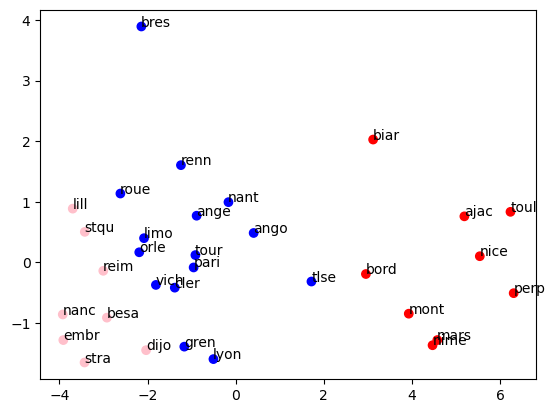

In [14]:
# Question 1:

# On commence par charger nos données
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

# On standarise nos données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# On applique l'ACP pour réduire les 12 dimensions des données en seulement 2 dimensions
pca = PCA(n_components=2)

# On transforme les données initiales X en un nouvel espace à 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# On applique K-means sur les données et on attribue à chaque ville un cluster
kmeans = KMeans(n_clusters=3)
clustering = kmeans.fit_predict(X_scaled)

# On visualise graphiquement nos clusters
colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

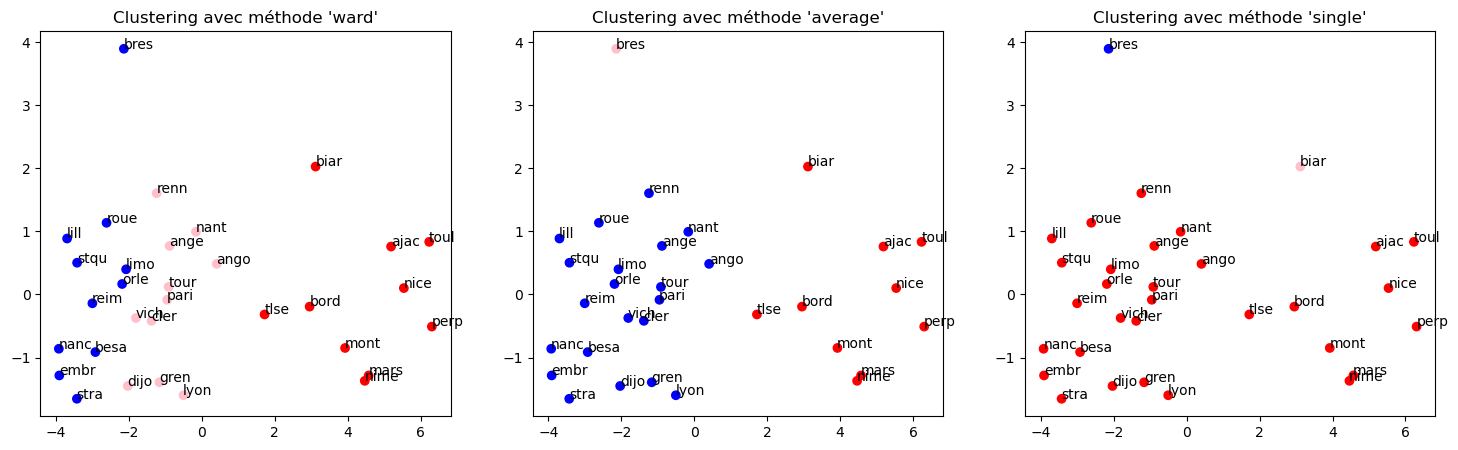

In [16]:
# Question 2:

# Définition des méthodes d'agrégation à tester
linkage_methods = ['ward', 'average', 'single']
colors = ['red', 'yellow', 'blue', 'pink']  # Couleurs pour les clusters

# Création des sous-graphiques pour afficher les résultats des trois méthodes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(linkage_methods):
    # Application d'AgglomerativeClustering avec la méthode choisie
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    cluster_labels = clustering.fit_predict(X_scaled)

    # Création du scatter plot des villes projetées dans le plan ACP
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=matplotlib.colors.ListedColormap(colors))
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        axes[i].annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    axes[i].set_title(f"Clustering avec méthode '{method}'")
plt.show()

KMeans - Nombre de clusters: 2, Silhouette Score: 0.625557719180767
KMeans - Nombre de clusters: 3, Silhouette Score: 0.35843370199100516
KMeans - Nombre de clusters: 4, Silhouette Score: 0.32057718873432645
KMeans - Nombre de clusters: 5, Silhouette Score: 0.2510874274501155
KMeans - Nombre de clusters: 6, Silhouette Score: 0.3394975746124216

Meilleur KMeans :
Nombre de clusters: 2, Silhouette Score: 0.625557719180767


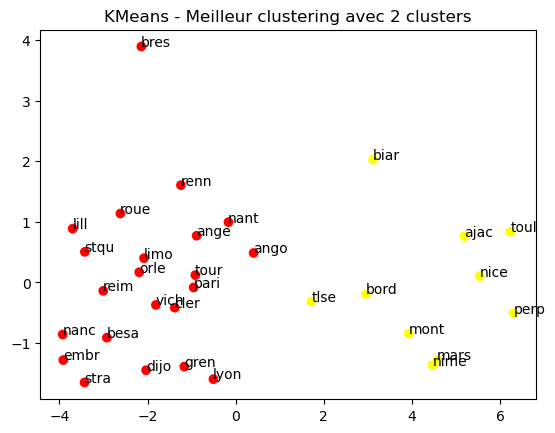

In [18]:
# Question 3:

# On crée des variables pour stocker les meilleurs résultats
best_kmeans_score = -1
best_kmeans_n_clusters = 0

best_agg_score = -1
best_agg_n_clusters = 0

range_n_clusters = [2, 3, 4, 5, 6]

# Boucle pour tester différentes partitions pour KMeans
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, kmeans_labels)
    
    print(f"KMeans - Nombre de clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")
    
    if silhouette_avg > best_kmeans_score:
        best_kmeans_score = silhouette_avg
        best_kmeans_n_clusters = n_clusters
        
# on affiche les meilleurs résultats
print("\nMeilleur KMeans :")
print(f"Nombre de clusters: {best_kmeans_n_clusters}, Silhouette Score: {best_kmeans_score}")

# Visualisation finale du meilleur clustering
best_clustering = KMeans(n_clusters=best_kmeans_n_clusters)
best_labels = best_clustering.fit_predict(X_scaled)

# Création du scatter plot des villes projetées dans le plan ACP (utilisation de X_pca pour visualisation 2D)
colors = ['red', 'yellow', 'blue', 'pink']  # Couleurs pour les clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap=matplotlib.colors.ListedColormap(colors[:best_kmeans_n_clusters]))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title(f"KMeans - Meilleur clustering avec {best_kmeans_n_clusters} clusters")
plt.show()

AgglomerativeClustering - Méthode: ward, Nombre de clusters: 2, Silhouette Score: 0.625557719180767
AgglomerativeClustering - Méthode: average, Nombre de clusters: 2, Silhouette Score: 0.625557719180767
AgglomerativeClustering - Méthode: single, Nombre de clusters: 2, Silhouette Score: 0.17828947881901694
AgglomerativeClustering - Méthode: ward, Nombre de clusters: 3, Silhouette Score: 0.3680782608000545
AgglomerativeClustering - Méthode: average, Nombre de clusters: 3, Silhouette Score: 0.49568744626910916
AgglomerativeClustering - Méthode: single, Nombre de clusters: 3, Silhouette Score: -0.03440482633721333
AgglomerativeClustering - Méthode: ward, Nombre de clusters: 4, Silhouette Score: 0.3182505663395757
AgglomerativeClustering - Méthode: average, Nombre de clusters: 4, Silhouette Score: 0.40409248129693376
AgglomerativeClustering - Méthode: single, Nombre de clusters: 4, Silhouette Score: 0.18321799761188345
AgglomerativeClustering - Méthode: ward, Nombre de clusters: 5, Silhouet

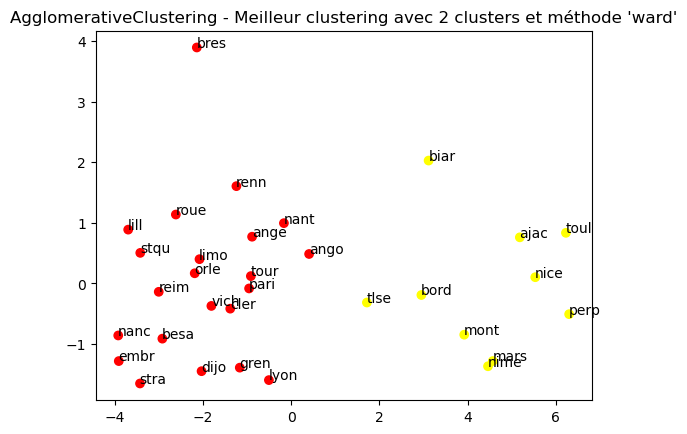

In [20]:
# Question 4:
# ON définit les méthodes d'agrégation à tester
linkage_methods = ['ward', 'average', 'single']
best_score = -1
best_n_clusters = 0
best_method = ""

# Boucle pour tester les partitions (2 à 6 clusters) et les différentes méthodes d'agrégation
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    for method in linkage_methods:
        # On applique AgglomerativeClustering avec le nombre de clusters et la méthode d'agrégation
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        cluster_labels = clustering.fit_predict(X_scaled)  # On applique le clustering sur les données normalisées

        # Calcul de l'indice de Silhouette
        silhouette_avg = silhouette_score(X_scaled, cluster_labels)
        
        print(f"AgglomerativeClustering - Méthode: {method}, Nombre de clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")
        
        # On verifie si c'est la meilleure partition
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_n_clusters = n_clusters
            best_method = method

# On affiche les résultats du meilleur indice Silhouette
print("\nMeilleur résultat AgglomerativeClustering :")
print(f"Nombre de clusters: {best_n_clusters}, Méthode: {best_method}, Silhouette Score: {best_score}")

# Visualisation finale du meilleur clustering avec la méthode et nombre de clusters trouvés
best_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_method)
best_labels = best_clustering.fit_predict(X_scaled)

# Création du scatter plot des villes projetées dans le plan ACP
colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap=matplotlib.colors.ListedColormap(colors[:best_n_clusters]))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title(f"AgglomerativeClustering - Meilleur clustering avec {best_n_clusters} clusters et méthode '{best_method}'")
plt.show()

AgglomerativeClustering - Méthode: ward, Silhouette Score: 0.3680782608000545
AgglomerativeClustering - Méthode: average, Silhouette Score: 0.49568744626910916
AgglomerativeClustering - Méthode: single, Silhouette Score: -0.03440482633721333

Meilleur résultat AgglomerativeClustering avec 3 clusters :
Méthode: average, Silhouette Score: 0.49568744626910916


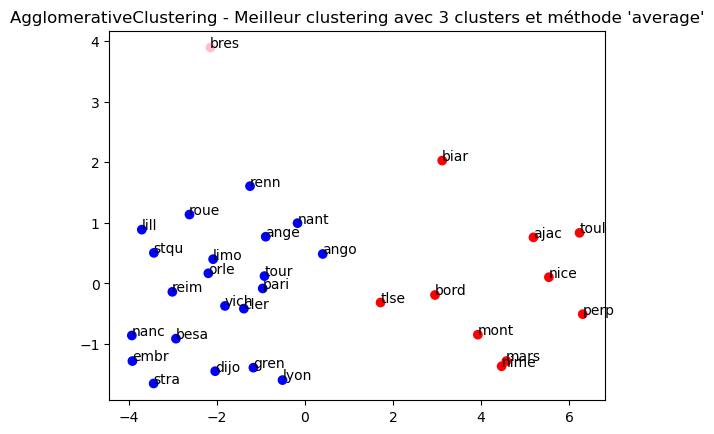

In [22]:
# Question 5:

# Pour déterminer quelle méthhode donnera la meilleure partition avec 3 clusters
# On doit compare le Silhouette Score de toutes les méthodes
# On reprend le code de la question 4 en fixant le nombre de clusters à 3

linkage_methods = ['ward', 'average', 'single']
best_score = -1
best_method = ""
n_clusters = 3

for method in linkage_methods:
    # On applique AgglomerativeClustering avec 3 clusters et la méthode d'agrégation
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    cluster_labels = clustering.fit_predict(X_scaled)  # Appliquer le clustering sur les données normalisées

    # On calcul l'indice de Silhouette
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    print(f"AgglomerativeClustering - Méthode: {method}, Silhouette Score: {silhouette_avg}")
    
    # On verifie si c'est la meilleure méthode
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_method = method

# On affiche les résultats du meilleur indice Silhouette
print("\nMeilleur résultat AgglomerativeClustering avec 3 clusters :")
print(f"Méthode: {best_method}, Silhouette Score: {best_score}")

# Visualisation finale du meilleur clustering avec la méthode trouvée
best_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=best_method)
best_labels = best_clustering.fit_predict(X_scaled)

# Création du scatter plot des villes projetées dans le plan ACP
colors = ['red', 'yellow', 'blue', 'pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title(f"AgglomerativeClustering - Meilleur clustering avec 3 clusters et méthode '{best_method}'")
plt.show()

In [24]:
# Question 6:

# KMeans :
# Avantages : simple et rapide à exécuter, facile à comprendre et efficace sur de grands ensembles de données.
# Il fonctionne bien pour des clusters de forme sphérique.
# Inconvénients : nécessite de connaître le nombre de clusters à l'avance, est sensible aux valeurs aberrantes 
# et est moins performant lorsque les clusters ont des formes irrégulières.

# Classification hiérarchique :
# Avantages : ne nécessite pas de définir le nombre de clusters dès le départ,
# ce qui permet de choisir la partition après avoir observé le dendrogramme.
# Elle est également capable de détecter des clusters de formes variées.
# Inconvénients : cette méthode est plus lente sur de gros jeux de données et le résultat dépend du choix 
# de la méthode d’agrégation (ward, average, single).

Silhouette score (KMeans → CAH 'average'): 0.4957
Silhouette score (KMeans direct, k=3): 0.3741
Meilleure méthode : KMeans (k=10) → CAH (average, k=3)


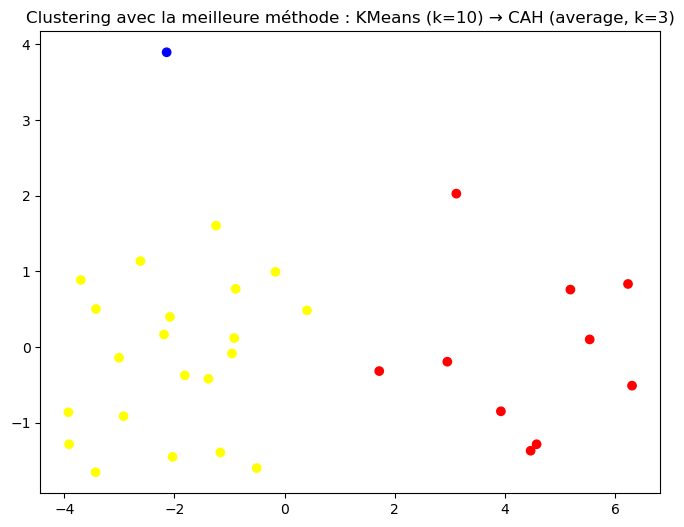

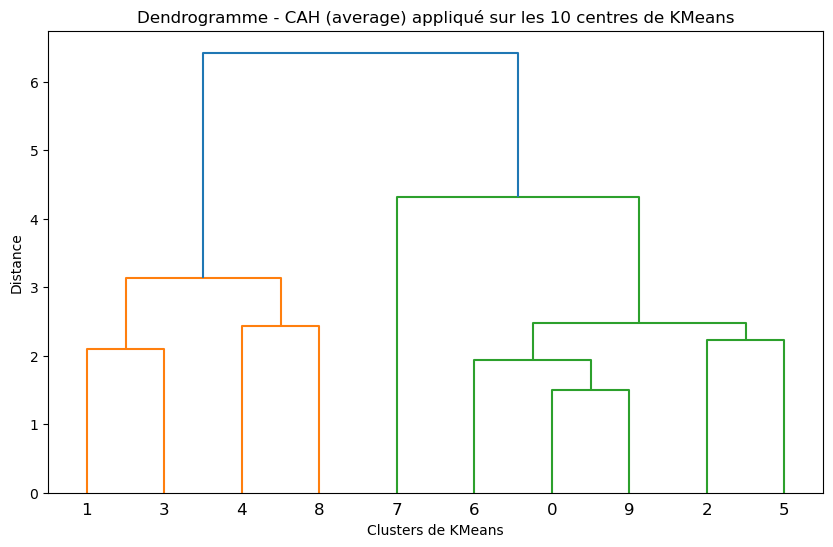

In [26]:
# Question 7:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

def hybride_clustering(X_scaled, X_pca, labels):
    # 1. Appliquer KMeans avec k=10
    kmeans_10 = KMeans(n_clusters=10, random_state=42)
    labels_kmeans_10 = kmeans_10.fit_predict(X_scaled)
    cluster_centers = kmeans_10.cluster_centers_  # On récupère les 10 centres

    # 2. Tester différentes méthodes d’agrégation pour CAH
    linkage_methods = ["ward", "average", "single"]
    best_cah_score = -1
    best_cah_labels = None
    best_cah_method = None

    for method in linkage_methods:
        cah = AgglomerativeClustering(n_clusters=3, linkage=method)
        labels_cah = cah.fit_predict(cluster_centers[labels_kmeans_10])  # Appliquer CAH sur les 10 centres
        score_cah = silhouette_score(X_scaled, labels_cah)

        if score_cah > best_cah_score:
            best_cah_score = score_cah
            best_cah_labels = labels_cah
            best_cah_method = method

    # 3. Appliquer directement KMeans avec k=3
    kmeans_3 = KMeans(n_clusters=3, random_state=42)
    labels_kmeans_3 = kmeans_3.fit_predict(X_scaled)
    score_kmeans = silhouette_score(X_scaled, labels_kmeans_3)

    print(f"Silhouette score (KMeans → CAH '{best_cah_method}'): {best_cah_score:.4f}")
    print(f"Silhouette score (KMeans direct, k=3): {score_kmeans:.4f}")

    # 4. Déterminer la meilleure méthode
    if best_cah_score > score_kmeans:
        best_labels = best_cah_labels
        best_method = f"KMeans (k=10) → CAH ({best_cah_method}, k=3)"
    else:
        best_labels = labels_kmeans_3
        best_method = "KMeans direct (k=3)"

    print(f"Meilleure méthode : {best_method}")

    # 5. Visualisation des clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels, cmap=matplotlib.colors.ListedColormap(['red', 'yellow', 'blue']))
    '''
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    '''
    plt.title(f"Clustering avec la meilleure méthode : {best_method}")
    plt.show()

    # 6. Affichage du dendrogramme basé sur les 10 centres de KMeans
    plt.figure(figsize=(10, 6))
    Z = linkage(cluster_centers, method=best_cah_method)  # Appliquer CAH sur les 10 centres
    dendrogram(Z)
    plt.title(f"Dendrogramme - CAH ({best_cah_method}) appliqué sur les 10 centres de KMeans")
    plt.xlabel("Clusters de KMeans")
    plt.ylabel("Distance")
    plt.show()

# Appel de la fonction avec les données normalisées et projetées
hybride_clustering(X_scaled, X_pca, labels)


In [32]:
# Question 8:

# On commence par charger nos données
# wdbc.csv
dataW = pd.read_csv('./wdbc.csv', sep=';', header=None)
W = dataW.values
labelsW = data.values

# On standarise nos données
scaler = StandardScaler()
W_scaled = scaler.fit_transform(W) 

# On applique l'ACP pour réduire les 12 dimensions des données en seulement 2 dimensions
pca = PCA(n_components=2)

# On transforme les données initiales X en un nouvel espace à 2 dimensions
W_pca = pca.fit_transform(W_scaled)

#spamb.csv
dataS = pd.read_csv('./spamb.csv', sep=';', header=None)
S = dataS.values

# On standarise nos données
scaler = StandardScaler()
S_scaled = scaler.fit_transform(S) 
labelsS = data.values

# On applique l'ACP pour réduire les 12 dimensions des données en seulement 2 dimensions
pca = PCA(n_components=2)

# On transforme les données initiales X en un nouvel espace à 2 dimensions
S_pca = pca.fit_transform(S_scaled)

Silhouette score (KMeans → CAH 'average'): 0.5309
Silhouette score (KMeans direct, k=3): 0.3152
Meilleure méthode : KMeans (k=10) → CAH (average, k=3)


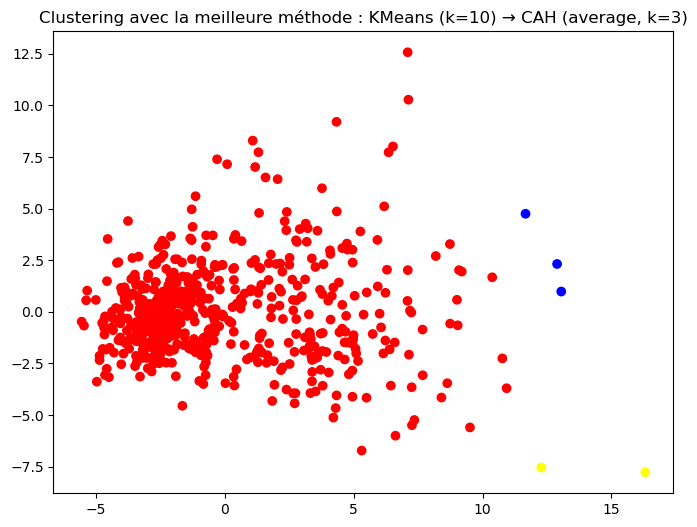

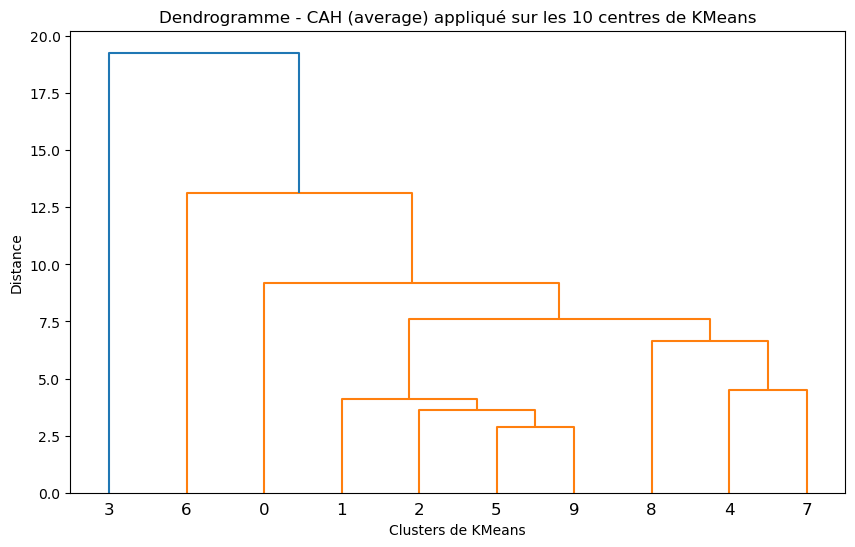

In [34]:
# On applique la fonction sur les données de wdbc.csv
hybride_clustering(W_scaled, W_pca, labelsW)

Silhouette score (KMeans → CAH 'average'): 0.4552
Silhouette score (KMeans direct, k=3): 0.1261
Meilleure méthode : KMeans (k=10) → CAH (average, k=3)


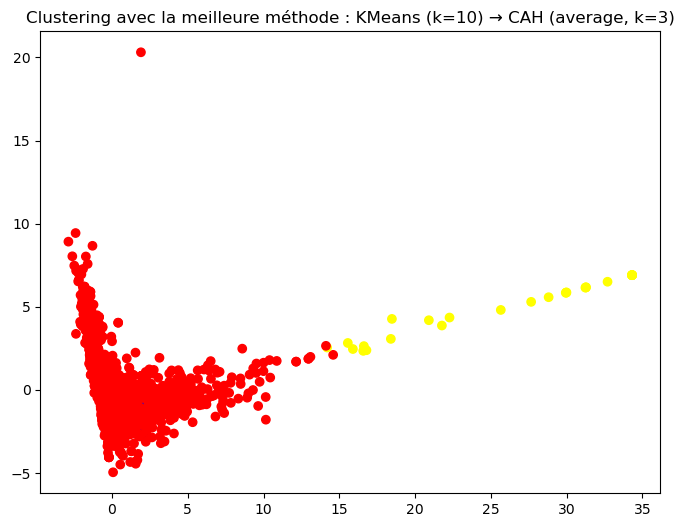

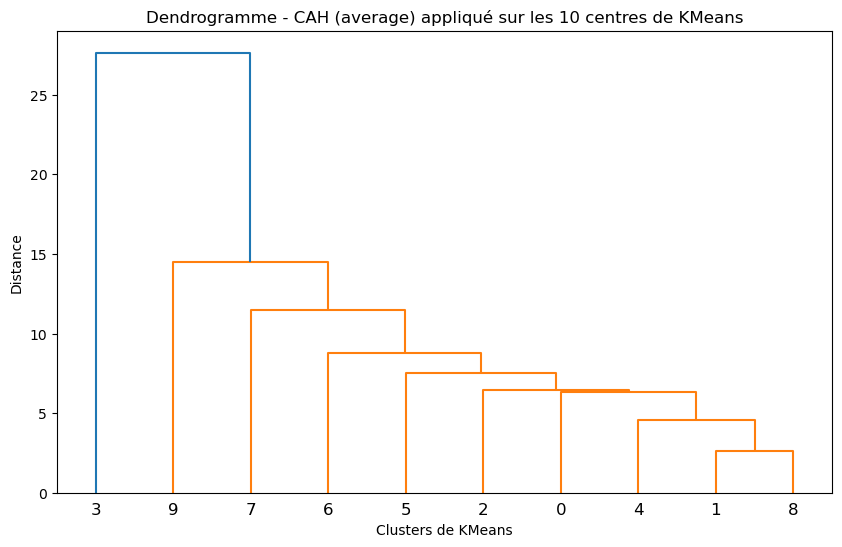

In [36]:
# On applique la fonction sur les données de spamb.csv
hybride_clustering(S_scaled, S_pca, labelsS)